## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

combined_mice_df = pd.merge(mouse_metadata, study_results,
                                 on='Mouse ID', how='left')
combined_mice_df.head()
# Display the data table for preview


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
combined_mice_df.info

<bound method DataFrame.info of      Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898 

In [3]:
combined_mice_df.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')

In [4]:
combined_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Checking the number of mice.
mouse_data = combined_mice_df["Mouse ID"].value_counts()
mouse_data

g989    13
a897    10
c402    10
r701    10
c832    10
        ..
o848     1
v199     1
x226     1
t573     1
h428     1
Name: Mouse ID, Length: 249, dtype: int64

In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

combined_mice_df[["Mouse ID", "Timepoint"]]

,Mouse ID,Timepoint
0,k403,0
1,k403,5
2,k403,10
3,k403,15
4,k403,20
...,...,...
1888,z969,25
1889,z969,30
1890,z969,35
1891,z969,40


In [7]:
# Optional: Get all the data for the duplicate mouse ID. 
sum(combined_mice_df.duplicated(subset=["Mouse ID", "Timepoint"]))


5

In [8]:
mask = combined_mice_df.duplicated(subset=["Mouse ID", "Timepoint"])
combined_mice_df.loc[mask]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [9]:
mask2 = combined_mice_df["Mouse ID"] != "g989"
clean_df = combined_mice_df.loc[mask2].reset_index(drop=True)
clean_df.describe()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1880.000000,1880.000000,1880.000000,1880.000000,1880.000000
mean,12.757979,25.660106,19.606383,50.435293,1.025000
std,7.181998,3.935064,14.094238,8.914197,1.139971
min,1.000000,15.000000,0.000000,22.050126,0.000000
25%,7.000000,25.000000,5.000000,45.000000,0.000000
50%,13.000000,27.000000,20.000000,48.933454,1.000000
75%,19.250000,29.000000,30.000000,56.324075,2.000000
max,24.000000,30.000000,45.000000,78.567014,4.000000


In [10]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df["Mouse ID"].value_counts()

k862    10
v991    10
c766    10
v923    10
a401    10
        ..
v199     1
t573     1
u153     1
o848     1
b447     1
Name: Mouse ID, Length: 248, dtype: int64

In [11]:
# Checking the number of mice in the clean DataFrame.
clean_df["Mouse ID"].nunique()

248

In [12]:
clean_df.describe()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1880.000000,1880.000000,1880.000000,1880.000000,1880.000000
mean,12.757979,25.660106,19.606383,50.435293,1.025000
std,7.181998,3.935064,14.094238,8.914197,1.139971
min,1.000000,15.000000,0.000000,22.050126,0.000000
25%,7.000000,25.000000,5.000000,45.000000,0.000000
50%,13.000000,27.000000,20.000000,48.933454,1.000000
75%,19.250000,29.000000,30.000000,56.324075,2.000000
max,24.000000,30.000000,45.000000,78.567014,4.000000


## Summary Statistics

In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
drug_groups = clean_df.groupby("Drug Regimen")

avg_tumor = drug_groups["Tumor Volume (mm3)"].mean()
med_tumor = drug_groups["Tumor Volume (mm3)"].median()
var_tumor = drug_groups["Tumor Volume (mm3)"].var()
std_tumor = drug_groups["Tumor Volume (mm3)"].std()
sem_tumor = drug_groups["Tumor Volume (mm3)"].sem()

summTable = pd.DataFrame()
summTable["Mean Tumor Volume"] = avg_tumor
summTable["Median Tumor Volume"] = med_tumor
summTable["Variance of Tumor Volume"] = var_tumor
summTable["St. Deviation of Tumor Volume"] = std_tumor
summTable["St. Error of Tumor Volume"] = sem_tumor
summTable

,Mean Tumor Volume,Median Tumor Volume,Variance of Tumor Volume,St. Deviation of Tumor Volume,St. Error of Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [14]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
drug_groups.agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [15]:


clean_df['Drug Regimen'].value_counts()

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Ceftamin     178
Infubinol    178
Propriva     148
Name: Drug Regimen, dtype: int64

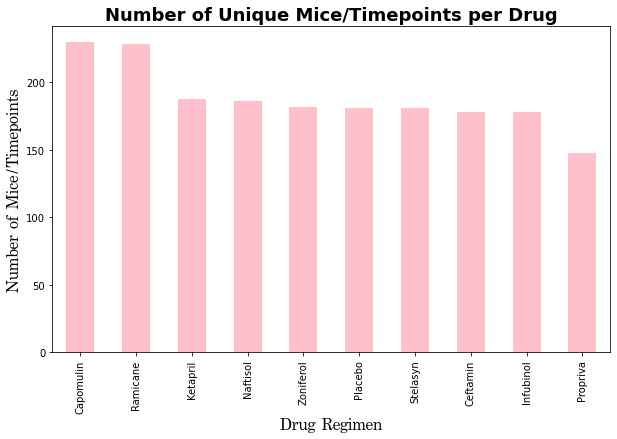

In [16]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

plt.figure(figsize=(10,6))
clean_df['Drug Regimen'].value_counts().plot(kind = "bar", color="pink")



plt.title("Number of Unique Mice/Timepoints per Drug", fontsize=18, fontweight="bold", fontname="Dejavu Sans")
plt.xlabel("Drug Regimen", fontsize=16, fontname="AppleMyungjo")
plt.ylabel("Number of Mice/Timepoints", fontsize=16, fontname="AppleMyungjo")

plt.show()

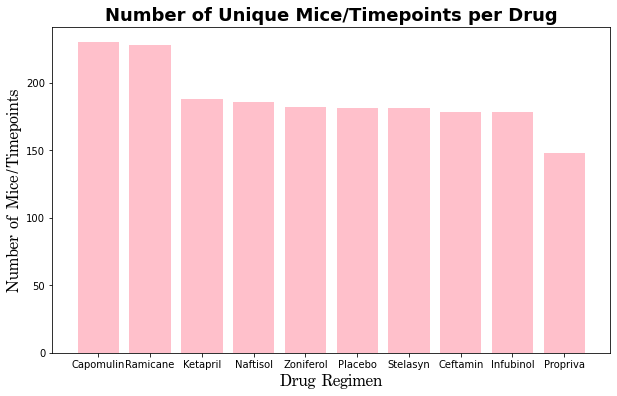

In [17]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
data = clean_df['Drug Regimen'].value_counts()

x = data.index
y = data.values

plt.figure(figsize=(10,6))
plt.bar(x, y, color="pink")

plt.title("Number of Unique Mice/Timepoints per Drug", fontsize=18, fontweight="bold", fontname="Dejavu Sans")
plt.xlabel("Drug Regimen", fontsize=16, fontname="AppleMyungjo")
plt.ylabel("Number of Mice/Timepoints", fontsize=16, fontname="AppleMyungjo")

plt.show()

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

clean_df.groupby("Sex")["Mouse ID"].count()

Sex
Female    922
Male      958
Name: Mouse ID, dtype: int64

In [19]:
clean_df.groupby(["Sex", "Mouse ID"]).size().reset_index().Sex.value_counts()

Male      125
Female    123
Name: Sex, dtype: int64

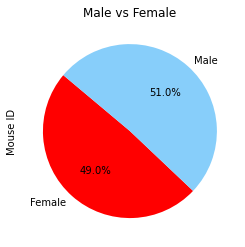

In [20]:
clean_df.groupby("Sex")["Mouse ID"].count().plot(kind='pie', colors = ['red', 'lightskyblue'],  autopct="%1.1f%%", startangle=140)

explode = (0.1, 0, 0, 0)

plt.title("Male vs Female")

plt.show()

In [21]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex = ["Male", "Female"]
numbers = [125, 123]
colors = ["yellow","green"]
explode = (0.1,0)


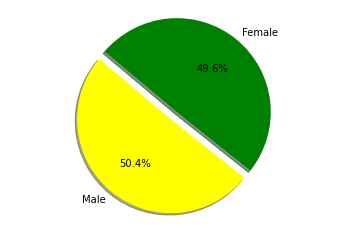

In [22]:
plt.pie(numbers, explode=explode, labels=sex, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
# Save an image of our chart and print the final product to the screen
plt.savefig("../Images/PyPies.png")
plt.show()

## Quartiles, Outliers and Boxplots

In [23]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
last_df = clean_df.loc[clean_df["Drug Regimen"].isin(regimens)].reset_index(drop=True)
last_df.head()
# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [24]:
last_df.groupby("Mouse ID").max()

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
a203,Infubinol,Female,20,23,45,67.973419,2
a251,Infubinol,Female,21,25,45,65.525743,1
a275,Ceftamin,Female,20,28,45,62.999356,3
a411,Ramicane,Male,3,22,45,45.466677,1
a444,Ramicane,Female,10,25,45,45.000000,0
...,...,...,...,...,...,...,...
y769,Ceftamin,Female,6,27,45,68.594745,4
y793,Capomulin,Male,17,17,45,45.000000,2
y865,Ceftamin,Male,23,26,45,64.729837,3


In [25]:
last_df.loc[(last_df["Mouse ID"] == 'a444')]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
421,a444,Ramicane,Female,10,25,0,45.000000,0
422,a444,Ramicane,Female,10,25,5,44.005975,0
423,a444,Ramicane,Female,10,25,10,44.512560,0
424,a444,Ramicane,Female,10,25,15,43.001280,0
425,a444,Ramicane,Female,10,25,20,41.714619,0
426,a444,Ramicane,Female,10,25,25,42.291394,0
427,a444,Ramicane,Female,10,25,30,42.786278,0
428,a444,Ramicane,Female,10,25,35,41.735951,0
429,a444,Ramicane,Female,10,25,40,42.504926,0
430,a444,Ramicane,Female,10,25,45,43.047543,0


In [26]:
maxMouse = last_df.groupby("Mouse ID").Timepoint.max().reset_index()
maxMouse

,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a275,45
3,a411,45
4,a444,45
...,...,...
95,y769,45
96,y793,45
97,y865,45
98,z578,45


In [27]:
regimen_df =  pd.DataFrame()

for indx, row in maxMouse.iterrows():
    mask = ((last_df["Mouse ID"] == row["Mouse ID"]) & (last_df["Timepoint"] == row["Timepoint"]))
    found = last_df.loc[mask]
    regimen_df = regimen_df.append(found)
    
regimen_df = regimen_df.reset_index(drop=True)
regimen_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
2,a275,Ceftamin,Female,20,28,45,62.999356,3
3,a411,Ramicane,Male,3,22,45,38.407618,1
4,a444,Ramicane,Female,10,25,45,43.047543,0
...,...,...,...,...,...,...,...,...
95,y769,Ceftamin,Female,6,27,45,68.594745,4
96,y793,Capomulin,Male,17,17,45,31.896238,2
97,y865,Ceftamin,Male,23,26,45,64.729837,3
98,z578,Ramicane,Male,11,16,45,30.638696,0


In [28]:
df_regimen = last_df.merge(maxMouse, on=["Mouse ID", "Timepoint"])
df_regimen.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1


In [29]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
drug_data = []

for drugs in ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]:
    found = df_regimen.loc[df_regimen["Drug Regimen"] == drugs, "Tumor Volume (mm3)"]
    
    quartiles = found.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    print(drugs)
    print()
    print(f"The lower quartile of temperatures is: {lowerq}")
    print(f"The upper quartile of temperatures is: {upperq}")
    print(f"The interquartile range of temperatures is: {iqr}")
    print(f"The the median of temperatures is: {quartiles[0.5]} ")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    
    print()
    print()

    drug_data.append(found.values)
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

Capomulin

The lower quartile of temperatures is: 32.37735684
The upper quartile of temperatures is: 40.1592203
The interquartile range of temperatures is: 7.781863460000004
The the median of temperatures is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


Ramicane

The lower quartile of temperatures is: 31.56046955
The upper quartile of temperatures is: 40.65900627
The interquartile range of temperatures is: 9.098536719999998
The the median of temperatures is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


Infubinol

The lower quartile of temperatures is: 54.04860769
The upper quartile of temperatures is: 65.52574285
The interquartile range of temperatures is: 11.477135160000003
The the median of temperatures is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


Ceftamin

The lower quartile o

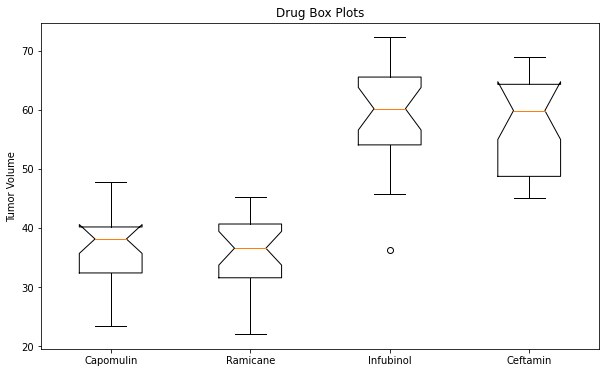

In [30]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.figure(figsize=(10,6))

plt.boxplot(drug_data, labels = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"], notch=True)

plt.title('Drug Box Plots')
plt.ylabel('Tumor Volume')

plt.show()

## Line and Scatter Plots

In [31]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse = last_df.loc[last_df['Mouse ID'] == "y793"].reset_index(drop=True)
mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,y793,Capomulin,Male,17,17,0,45.000000,0
1,y793,Capomulin,Male,17,17,5,41.019913,0
2,y793,Capomulin,Male,17,17,10,41.630010,1
3,y793,Capomulin,Male,17,17,15,42.283665,1
4,y793,Capomulin,Male,17,17,20,40.716428,2
5,y793,Capomulin,Male,17,17,25,38.992734,2
6,y793,Capomulin,Male,17,17,30,35.726023,2
7,y793,Capomulin,Male,17,17,35,36.327870,2
8,y793,Capomulin,Male,17,17,40,31.475411,2
9,y793,Capomulin,Male,17,17,45,31.896238,2


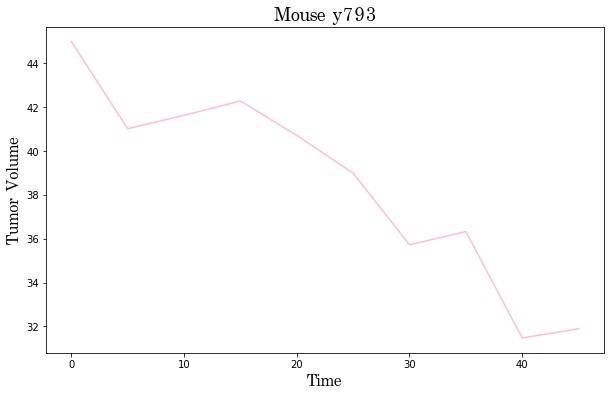

In [32]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
plt.figure(figsize=(10,6))

x = mouse.Timepoint
y = mouse["Tumor Volume (mm3)"]

plt.plot(x, y, color="pink")

plt.title("Mouse y793", fontsize=18, fontweight="bold", fontname="AppleMyungjo")
plt.xlabel('Time', fontsize=16, fontname="AppleMyungjo")
plt.ylabel("Tumor Volume", fontsize=16, fontname="AppleMyungjo")

plt.show()

## Correlation and Regression

In [33]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
mmTumor_df = last_df.loc[last_df["Drug Regimen"] == "Capomulin"].groupby("Mouse ID")["Weight (g)", "Tumor Volume (mm3)"].mean().reset_index()
mmTumor_df.head()

<ipython-input-33-0373df3afe3d>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mmTumor_df = last_df.loc[last_df["Drug Regimen"] == "Capomulin"].groupby("Mouse ID")["Weight (g)", "Tumor Volume (mm3)"].mean().reset_index()


,Mouse ID,Weight (g),Tumor Volume (mm3)
0,b128,22,41.963636
1,b742,21,40.083699
2,f966,17,36.505973
3,g288,19,41.990097
4,g316,22,44.613344


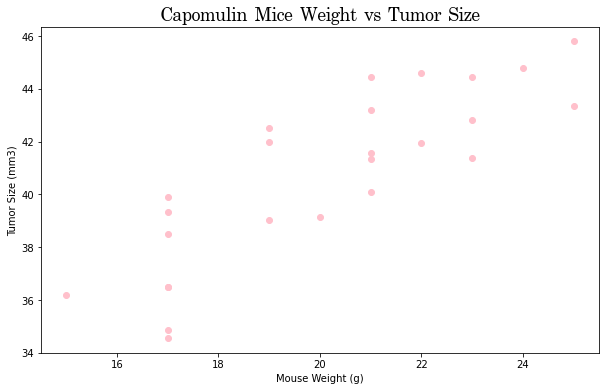

In [34]:
plt.figure(figsize=(10,6))

plt.scatter(mmTumor_df["Weight (g)"], mmTumor_df["Tumor Volume (mm3)"], color = "pink")
plt.title("Capomulin Mice Weight vs Tumor Size", fontsize=18, fontweight="bold", fontname = "AppleMyungjo")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Size (mm3)")

plt.show()

In [35]:
mmTumor_df.corr()

,Weight (g),Tumor Volume (mm3)
Weight (g),1.000000,0.841936
Tumor Volume (mm3),0.841936,1.000000


In [36]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import scipy.stats as sts

In [37]:
feature = mmTumor_df["Weight (g)"]
target = mmTumor_df["Tumor Volume (mm3)"]

y = 0.95x + 21.55
The r-squared is: 0.7088568047708717


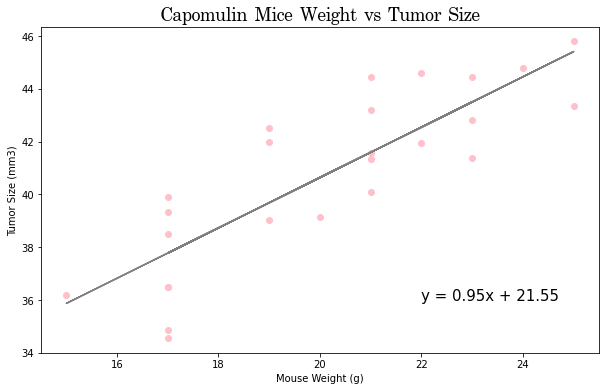

In [38]:
(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(feature, target)
regress_values = feature * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The r-squared is: {rvalue**2}")

plt.figure(figsize=(10,6))

plt.scatter(feature, target, color = "pink")
plt.title("Capomulin Mice Weight vs Tumor Size", fontsize=18, fontweight="bold", fontname = "AppleMyungjo")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Size (mm3)")
plt.plot(feature, regress_values, color="grey")
plt.annotate(line_eq,(22,36),fontsize=15,color="black")

plt.show()